In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

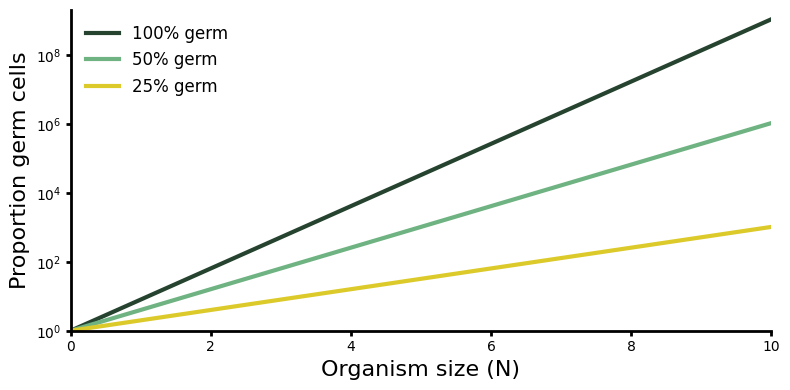

In [7]:
#Figure 1
fig, ax = plt.subplots(figsize=(8, 4))

#parameters and model
generations = np.arange(0, 11)  # 0 to 10 generations
total_cells = 8
pop_size = lambda x : (x * total_cells) ** generations

#plots
ax.semilogy(generations, pop_size(1.00), color='#26432F', linewidth=3, label='100% germ')
ax.semilogy(generations, pop_size(0.50), color='#6FB382', linewidth=3, label='50% germ')
ax.semilogy(generations, pop_size(0.25), color='#DCCA2B', linewidth=3, label='25% germ')

#plot size
ax.set_xlim(0, 10)
ax.set_ylim(1, 2e9)

#plot style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

#labels
ax.set_xlabel('Organism size (N)', fontsize=16)
ax.set_ylabel('Proportion germ cells', fontsize=16)
ax.legend(loc='upper left', fontsize=12, frameon=False)

#show and save
plt.tight_layout()
plt.savefig("fig_1.pdf")
plt.show()

In [15]:
data = [
    # Astrephomene
    {'species': 'Astrephomene gubernaculifera',        'max_cells': 64,        'max_gonidia': 60},
    {'species': 'Astrephomene perforata',              'max_cells': 64,        'max_gonidia': 62},

    # Pleodorina
    {'species': 'Pleodorina californica',              'max_cells': 128,       'max_gonidia': 85},
    {'species': 'Pleodorina illinoisensis',            'max_cells': 32,        'max_gonidia': 28},
    {'species': 'Pleodorina indica',                   'max_cells': 128,       'max_gonidia': 102},
    {'species': 'Pleodorina japonica',                 'max_cells': 128,       'max_gonidia': 103},

    # Volvox
    {'species': 'Volvox africanus',                    'max_cells': 13700,     'max_gonidia': 8},
    {'species': 'Volvox aureus',                       'max_cells': 3200,      'max_gonidia': 12},
    {'species': 'Volvox barberi',                      'max_cells': 47800,     'max_gonidia': 9},
    {'species': 'Volvox carteri kawasakiensis',        'max_cells': 3000,      'max_gonidia': 30},
    {'species': 'Volvox carteri nagariensis',          'max_cells': 8000,      'max_gonidia': 21},
    {'species': 'Volvox carteri weismannia',           'max_cells': 7500,      'max_gonidia': 12},
    {'species': 'Volvox dissipatrix',                  'max_cells': 31800,     'max_gonidia': 10},
    {'species': 'Volvox gigas',                        'max_cells': 3000,      'max_gonidia': 60},
    {'species': 'Volvox globator',                     'max_cells': 22000,     'max_gonidia': 17},
    {'species': 'Volvox obversus',                     'max_cells': 4000,      'max_gonidia': 8},
    {'species': 'Volvox rouseletii',                   'max_cells': 42000,     'max_gonidia': 16},
    {'species': 'Volvox tertius',                      'max_cells': 2000,      'max_gonidia': 12}]

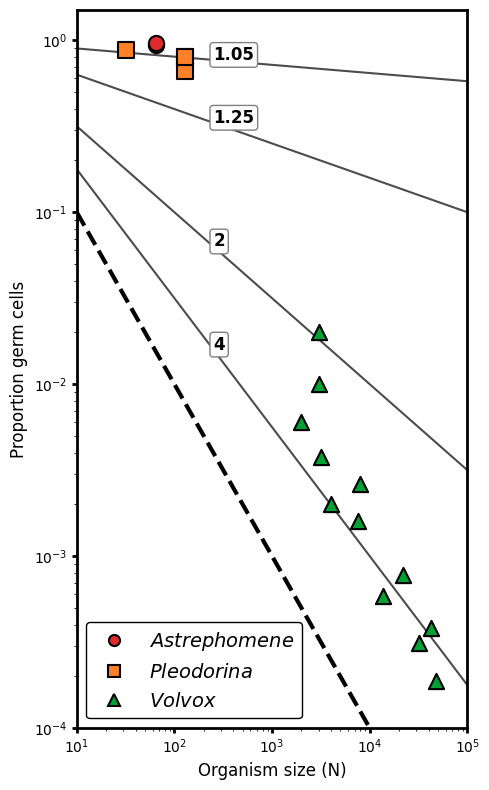

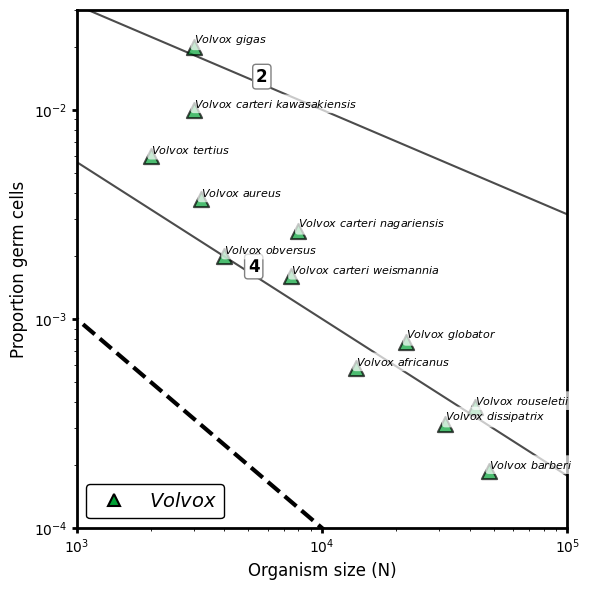

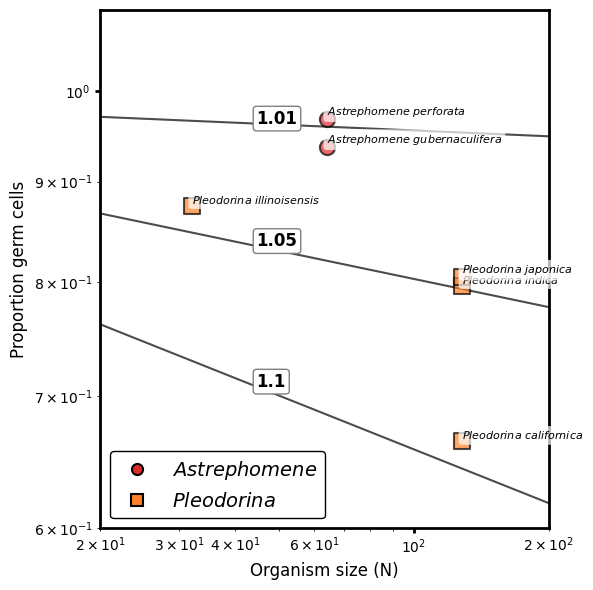

In [30]:
#fig2/sup figs

#load data
df_full = pd.DataFrame(data)
df_full['genus'] = df_full['species'].str.split().str[0]
df_full['p_germ_max'] = df_full['max_gonidia'] / df_full['max_cells']


def plot_figure(df, survival_levels, x_min, x_max, y_min, y_max, filename, figsize=(6, 6), add_labels=False):
    fig, ax = plt.subplots(figsize=figsize)


    # Add theoretical minimum line: p_g = 1/N
    N_values = np.logspace(1, 12, 1000) #range of organism sizes
    N_boundary = np.logspace(1, 12, 100)
    p_g_boundary = 1 / N_boundary
    ax.loglog(N_boundary, p_g_boundary, 'k--', linewidth=3)


    #plot contours
    for level in survival_levels:
        p_g_contour = []
        N_contour = []

        for N in N_values:
            ln_pg = np.log(N) * (1/level - 1)
            if ln_pg < 0:  # p_g must be < 1
                p_g = np.exp(ln_pg)
                if p_g >= 1/N and p_g >= 0.000000001:  #must have at least 1 germ cell
                    p_g_contour.append(p_g)
                    N_contour.append(N)

        if len(p_g_contour) > 10:
            ax.loglog(N_contour, p_g_contour, 'k-', linewidth=1.5, alpha=0.7)

            #add labels if in range
            if len(N_contour) > 0:
                visible_indices = [i for i in range(len(N_contour))
                                 if x_min <= N_contour[i] <= x_max and y_min <= p_g_contour[i] <= y_max]

                if visible_indices:
                    label_idx = visible_indices[int(len(visible_indices) * 0.35)]
                    ax.text(N_contour[label_idx], p_g_contour[label_idx], f'{level}',
                           fontsize=12, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=1, edgecolor='gray'))


    genera_in_data = df['genus'].unique()

    #genus plot style
    genus_styles = {
        'Astrephomene': {'color': '#DF2B2E', 'marker': 'o'},
        'Pleodorina':   {'color': '#FF8027', 'marker': 's'},
        'Volvox':       {'color': '#00A034', 'marker': '^'}}

    #plot points
    legend_handles = []
    for genus in genera_in_data:
        genus_df = df[df['genus'] == genus]
        color = genus_styles[genus]['color']
        marker = genus_styles[genus]['marker']

        #plot all species in the genus
        for _, row in genus_df.iterrows():
            alpha = 0.7 if add_labels else 1.0
            ax.scatter(row['max_cells'], row['p_germ_max'],
                      color=color, s=120, marker=marker,
                      edgecolors='black', linewidth=1.5, zorder=10, clip_on=False, alpha=alpha)

            #add species (if requested)
            if add_labels:
                full_name = row['species']
                ax.text(row['max_cells'], row['p_germ_max'],
                      r'$\mathit{' + full_name.replace(' ', r'\ ') + r'}$',
                      fontsize=8, ha='left', va='bottom',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=.7, edgecolor='none'),
                      zorder=11)

        #legend
        legend_handles.append(Line2D([0], [0], marker=marker, color='w',
                                    markerfacecolor=color, markersize=8,
                                    markeredgecolor='black', markeredgewidth=1.5,
                                    label=r'$\mathit{' + genus + r'}$'))

    #plot style
    ax.set_xlabel('Organism size (N)', fontsize=12)
    ax.set_ylabel('Proportion germ cells', fontsize=12)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.spines[:].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)

    #legend
    ax.legend(handles=legend_handles, loc='lower left',
             fontsize=14, frameon=True, framealpha=1, edgecolor="black")

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


#Fig2: All three genera
plot_figure(df_full, [1.05, 1.25, 2, 4], 10, 1e5, 1e-4, 1.5, "fig_2.pdf",
           figsize=(5, 8), add_labels=False)

#Sup Fig 1A: Volvox only
plot_figure(df_full[df_full['genus'] == 'Volvox'],
            [1.05, 1.25, 2, 4], 1e3, 1e5, 1e-4, 3e-2, "sup_fig11.pdf", add_labels=True)

#Sup Fig 1B: Astrephomene and Pleodorina
plot_figure(df_full[df_full['genus'].isin(['Astrephomene', 'Pleodorina'])],
            [1.01, 1.05, 1.1], 2e1, 2e2, 6e-1, 1.1, "sup_fig12.pdf", add_labels=True)